In [10]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import auc, roc_curve
from sklearn.tree import DecisionTreeClassifier

from src.data.datasets.overlaps import OverlapsDataset

In [11]:
dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet")

df = pd.DataFrame(
    np.concatenate([dataset.features, dataset.targets.reshape(-1, 1)], axis=1), 
    columns=dataset.feature_names + ['is_overlapping']
)
df

Extracting non-overlapping features: 100%|██████████| 2046/2046 [00:53<00:00, 38.05it/s]


,levenshtein_distance,match_len1,match_len2,match_ratio1,match_ratio2,note_C,note_C♯,note_D,note_D♯,note_E,...,interval_6,interval_7,interval_8,interval_9,interval_10,interval_lt,interval_gt,interval_to_rest,interval_from_rest,is_overlapping
0,-0.160440,-0.290194,-0.287466,-0.288709,-0.272194,-0.588623,-0.686576,-0.325411,-0.658348,-0.876159,...,-0.269407,0.054132,-0.339295,-0.402545,-0.313377,-0.532676,-0.359366,-0.942306,-0.942306,1.0
1,-1.587198,3.874273,5.260325,3.892242,2.887591,-0.940983,0.383947,-0.489617,-0.658348,-0.416129,...,-0.269407,1.016486,-0.339295,-0.402545,-0.313377,-0.532676,-0.359366,-0.376814,-0.376814,1.0
2,-1.582702,4.854147,2.671356,4.391805,5.573408,-0.236262,-0.285130,-0.982234,-0.071310,-0.531136,...,0.549842,-0.427044,2.471146,-0.402545,-0.313377,-0.532676,-0.359366,-1.225052,-1.225052,1.0
3,0.962949,-0.290194,-0.287466,-0.288709,-0.272194,2.817529,-0.151314,-0.161206,0.515728,-0.876159,...,-0.269407,-0.908221,-0.339295,-0.402545,-0.313377,2.029095,-0.359366,0.754171,0.754171,1.0
4,1.231586,-0.290194,-0.287466,-0.288709,-0.272194,1.408087,-0.686576,-0.161206,-0.658348,0.848956,...,-0.269407,1.016486,0.285248,4.218279,3.191049,-0.532676,3.060482,-1.225052,-1.225052,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,2.232867,-0.290194,-0.287466,-0.288709,-0.272194,-0.001355,-0.686576,-0.982234,0.124369,-0.646144,...,-0.269407,-0.908221,-0.027023,-0.402545,3.191049,-0.532676,-0.359366,3.581631,3.581631,0.0
2076,0.816420,-0.290194,-0.287466,-0.288709,-0.272194,1.525540,3.194072,-0.489617,1.885482,-0.761152,...,-0.269407,-0.908221,-0.339295,-0.402545,-0.313377,1.388652,0.129184,1.602409,1.602409,0.0
2077,2.232867,-0.290194,-0.287466,-0.288709,-0.272194,0.703366,-0.686576,-0.489617,0.124369,-0.646144,...,-0.269407,0.054132,-0.027023,-0.402545,3.191049,-0.532676,-0.359366,3.581631,3.581631,0.0
2078,0.816420,-0.290194,-0.287466,-0.288709,-0.272194,1.290633,3.194072,-0.325411,1.885482,-0.646144,...,-0.269407,-0.427044,-0.339295,-0.402545,-0.313377,1.388652,0.129184,1.602409,1.602409,0.0


In [12]:
train_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="train")
test_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="test")

Extracting non-overlapping features: 100%|██████████| 126/126 [00:03<00:00, 32.73it/s]


In [13]:
classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [14]:
X_train = train_dataset.features
X_test = test_dataset.features
y_train = train_dataset.targets
y_test = test_dataset.targets

In [15]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

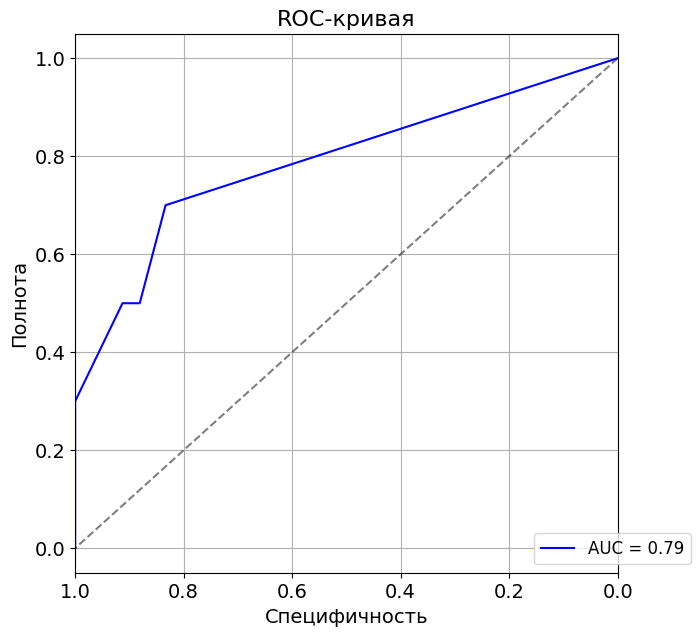

In [16]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))

plt.plot(1-fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [1, 0], color="black", linestyle="--", alpha=0.5)
plt.xlabel("Специфичность", fontsize=14)
plt.ylabel("Полнота", fontsize=14)
plt.xlim((1, 0))
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0), fontsize=12)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

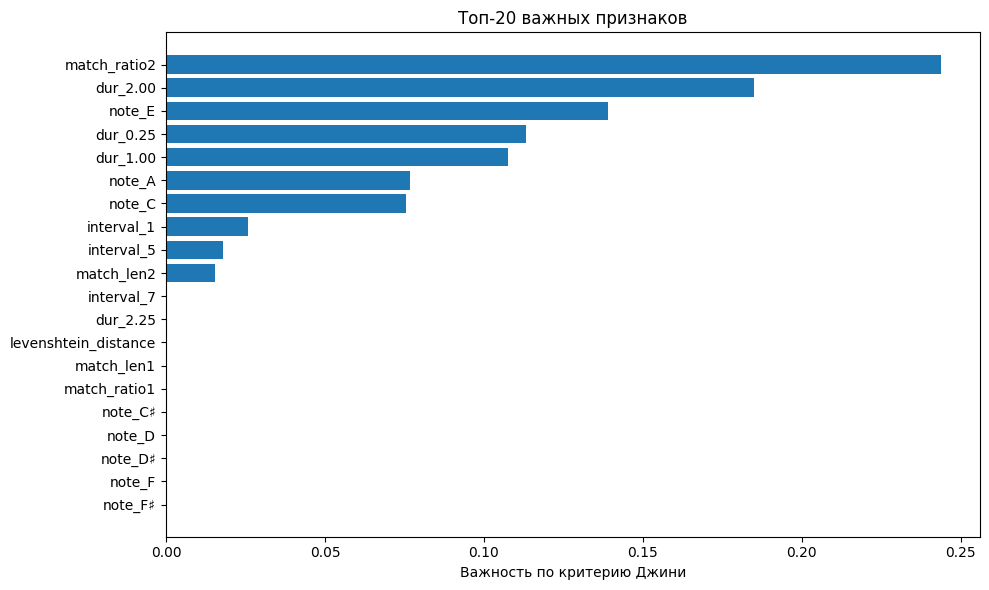

In [17]:
importance = np.abs(classifier.feature_importances_)
feature_importance = dict(zip(train_dataset.feature_names, importance))
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

top_features = list(feature_importance.items())[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in top_features], [f[1] for f in top_features])
plt.xlabel('Важность по критерию Джини')
plt.title('Топ-20 важных признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

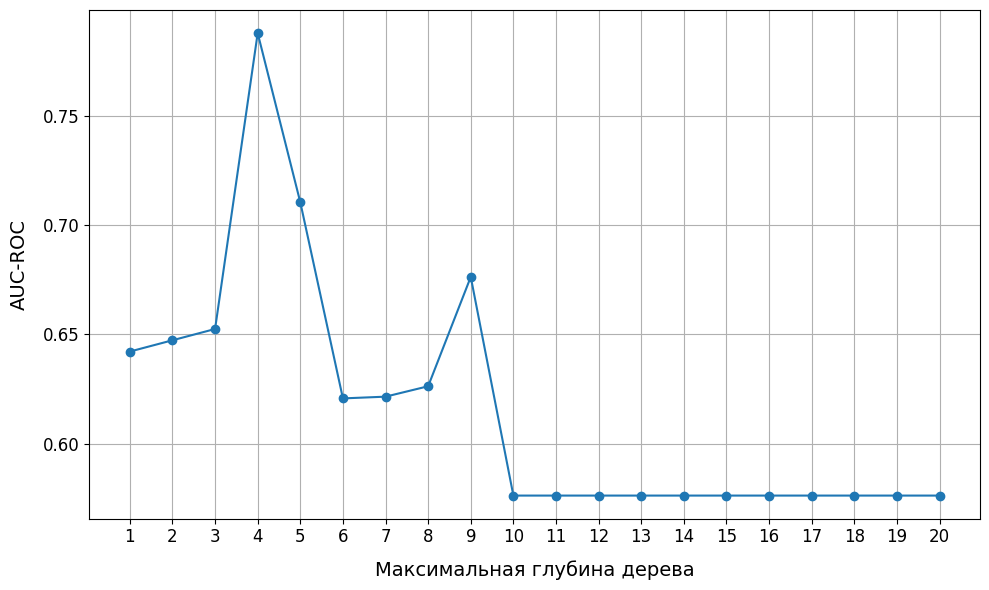

In [18]:
MAX_DEPTHS = range(1, 21)
depths = []
aucs = []

for max_depth in MAX_DEPTHS:
    classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    depths.append(max_depth)
    aucs.append(roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(depths, aucs, marker='o')
plt.xlabel('Максимальная глубина дерева', fontsize=14, labelpad=10)
plt.ylabel('AUC-ROC', fontsize=14, labelpad=10)
plt.grid(True)
plt.xticks(depths, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()